In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kruskal
import scikit_posthocs as sp
from preprocess import preprocess_data #전처리 함수 

In [2]:
# 제주권역 파일 불러오기
trav_mas_df1 = pd.read_csv("../../data/jeju/TS_csv/tn_traveller_master_여행객 Master_D.csv")
trav_mas_df2 = pd.read_csv("../../data/jeju/VS_csv/tn_traveller_master_여행객 Master_D.csv")
va_info_df1 = pd.read_csv("../../data/jeju/TS_csv/tn_visit_area_info_방문지정보_D.csv")
va_info_df2 = pd.read_csv("../../data/jeju/VS_csv/tn_visit_area_info_방문지정보_D.csv")
trav_mas = pd.concat([trav_mas_df1,trav_mas_df2],axis=0, ignore_index=True)
va_info = pd.concat([va_info_df1,va_info_df2],axis=0, ignore_index=True)




C:\Users\User\AppData\Local\Temp\ipykernel_4972\662911773.py:4: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  va_info_df1 = pd.read_csv("../../data/jeju/TS_csv/tn_visit_area_info_방문지정보_D.csv")


In [3]:

mapping_plan =  {
    "VISIT_AREA_TYPE_CD": "VIS",
    "VISIT_CHC_REASON_CD": "REN",
    "DGSTFN": "DGS",
    "REVISIT_INTENTION": "REP",
    "RCMDTN_INTENTION": "REC",
    "LODGING_TYPE_CD": "HTY",
    "TRAVEL_STYL_1": "TSY",
    "TRAVEL_STYL_2": "TSY",
    "TRAVEL_STYL_3": "TSY",
    "TRAVEL_STYL_4": "TSY",
    "TRAVEL_STYL_5": "TSY",
    "TRAVEL_STYL_6": "TSY",
    "TRAVEL_STYL_7": "TSY",
    "TRAVEL_STYL_8": "TSY",
    "ACTIVITY_TYPE_CD": "ACT",
    "TRAVEL_MOTIVE_1": "TMT",
    "TRAVEL_MOTIVE_2": "TMT",
    "TRAVEL_MOTIVE_3": "TMT"
}
rename_map ={
    "TRAVEL_ID": "여행ID",
    "TRAVELER_ID": "여행ID",
    "VISIT_AREA_ID": "방문지ID",
    "ACTIVITY_TYPE_CD": "활동유형코드",
    "RESIDENCE_SGG_CD": "거주시군구코드",
    "GENDER": "성별",
    "AGE_GRP": "연령대",
    "EDU_NM": "최종학력명",
    "EDU_FNSH_SE": "최종학력여부",
    "MARR_STTS": "결혼상태",
    "FAMILY_MEMB": "가구원수",
    "JOB_NM": "직업",
    "JOB_ETC": "직업_기타",
    "INCOME": "본인소득",
    "HOUSE_INCOME": "가구소득",
    "TRAVEL_TERM": "여행일수_기간",
    "TRAVEL_NUM": "여행빈도",
    "TRAVEL_LIKE_SIDO_1": "선호여행_시도_1",
    "TRAVEL_LIKE_SGG_1": "선호여행_시군구_1",
    "TRAVEL_LIKE_SIDO_2": "선호여행_시도_2",
    "TRAVEL_LIKE_SGG_2": "선호여행_시군구_2",
    "TRAVEL_LIKE_SIDO_3": "선호여행_시도_3",
    "TRAVEL_LIKE_SGG_3": "선호여행_시군구_3",
    "TRAVEL_STYL_1": "여행스타일1",
    "TRAVEL_STYL_2": "여행스타일2",
    "TRAVEL_STYL_3": "여행스타일3",
    "TRAVEL_STYL_4": "여행스타일4",
    "TRAVEL_STYL_5": "여행스타일5",
    "TRAVEL_STYL_6": "여행스타일6",
    "TRAVEL_STYL_7": "여행스타일7",
    "TRAVEL_STYL_8": "여행스타일8",
    "TRAVEL_STATUS_RESIDENCE": "여행출발_거주지",
    "TRAVEL_STATUS_DESTINATION": "여행출발_도착지",
    "TRAVEL_STATUS_ACCOMPANY": "여행동행_유형",
    "TRAVEL_STATUS_YMD": "여행출발일자",
    "TRAVEL_MOTIVE_1": "여행동기1",
    "TRAVEL_MOTIVE_2": "여행동기2",
    "TRAVEL_MOTIVE_3": "여행동기3",
    "TRAVEL_COMPANIONS_NUM": "여행동반자수",
    "VISIT_ORDER": "진행순서",
    "VISIT_AREA_NM": "방문지명",
    "VISIT_START_YMD": "방문시작일자",
    "VISIT_END_YMD": "방문종료일자",
    "ROAD_NM_ADDR": "도로명주소",
    "LOTNO_ADDR": "지번주소",
    "X_COORD": "X좌표",
    "Y_COORD": "Y좌표",
    "ROAD_NM_CD": "도로명코드",
    "LOTNO_CD": "지번코드",
    "POI_ID": "POI ID",
    "POI_NM": "POI명",
    "RESIDENCE_TIME_MIN": "체류시간_분",
    "VISIT_AREA_TYPE_CD": "방문지역유형코드",
    "REVISIT_YN": "재방문여부",
    "VISIT_CHC_REASON_CD": "방문선택이유코드",
    "LODGING_TYPE_CD": "숙소유형코드",
    "DGSTFN": "만족도",
    "REVISIT_INTENTION": "재방문의향",
    "RCMDTN_INTENTION": "추천의향",
    "SGG_CD": "시군구코드"
}
va_info_df = preprocess_data(
    va_info,
    mapping_plan,
    rename_map,
    output_filename="va_info_Jeju.csv",
    region = 'jeju'
)

trav_mas_df = preprocess_data(
    trav_mas,
    mapping_plan,
    rename_map,
    output_filename="trav_mas_Jeju.csv",
    region = 'jeju'
)

'       VISIT_AREA_ID  TRAVEL_ID  VISIT_ORDER VISIT_AREA_NM VISIT_START_YMD  \
0         2210210002  d_d006731            7         미스틱3도      2022-10-21   
1         2210180004  d_d002613            3       에스제이렌트카      2022-10-18   
2         2209030004  d_d001011           20         루프탑정원      2022-09-03   
3         2209170005  d_d001386           17          법환식당      2022-09-17   
4         2210090001  d_d002308           16       돌카롱 중문점      2022-10-09   
...              ...        ...          ...           ...             ...   
70051     2210120003  a_a006200           12          카페솔트      2022-10-12   
70052     2210230004  d_d002036           20   진고복식당 제주공항점      2022-10-23   
70053     2210280004  d_d009206            5  금호리조트 제주아쿠아나      2022-10-28   
70054     2210100002  d_d004325            7     김영갑갤러리두모악      2022-10-10   
70055     2210220006  d_d004359            8             집      2022-10-22   

      VISIT_END_YMD                 ROAD_NM_ADDR              

'       VISIT_AREA_ID  TRAVEL_ID  VISIT_ORDER VISIT_AREA_NM VISIT_START_YMD  \
0         2210210002  d_d006731            7         미스틱3도      2022-10-21   
1         2210180004  d_d002613            3       에스제이렌트카      2022-10-18   
2         2209030004  d_d001011           20         루프탑정원      2022-09-03   
3         2209170005  d_d001386           17          법환식당      2022-09-17   
4         2210090001  d_d002308           16       돌카롱 중문점      2022-10-09   
...              ...        ...          ...           ...             ...   
70051     2210120003  a_a006200           12          카페솔트      2022-10-12   
70052     2210230004  d_d002036           20   진고복식당 제주공항점      2022-10-23   
70053     2210280004  d_d009206            5  금호리조트 제주아쿠아나      2022-10-28   
70054     2210100002  d_d004325            7     김영갑갤러리두모악      2022-10-10   
70055     2210220006  d_d004359            8             집      2022-10-22   

      VISIT_END_YMD                 ROAD_NM_ADDR              

'     TRAVELER_ID  RESIDENCE_SGG_CD GENDER  AGE_GRP  EDU_NM  EDU_FNSH_SE  \
0        b011774                31      여       30       6            1   
1        d009928                29      여       20       6            2   
2        d010131                26      남       20       7            2   
3        d006004                50      여       20       6            1   
4        d002965                50      여       30       6            1   
...          ...               ...    ...      ...     ...          ...   
3595     d012387                50      남       40       4            1   
3596     d004823                50      남       40       6            1   
3597     d006166                11      여       50       6            1   
3598     d011757                11      남       20       6            2   
3599     d006693                11      남       20       4            1   

      MARR_STTS  FAMILY_MEMB  JOB_NM  JOB_ETC  ...  TRAVEL_STYL_7  \
0             1            1 

In [4]:
va_info = va_info_df[['여행ID','진행순서','방문지명','POI명','방문지역유형코드','방문선택이유코드']]
va_info = va_info.sort_values(by= ['여행ID','진행순서']).reset_index(drop=True)
va_info['여행ID'].value_counts()

d_d004817    77
d_d002701    77
d_d002283    73
d_d004100    67
d_d006312    63
             ..
d_d004709     2
a_a006980     2
d_d003737     2
d_d012492     2
a_a006269     1
Name: 여행ID, Length: 4000, dtype: int64

In [5]:
# 주관이 담긴 분류표 
df_theme=pd.read_csv('../../data/matrix/final_matrix.csv',index_col=0)
df_theme.index.name = '여행동기'
df_theme.loc['새로운 경험 추구', '기타'] = 1
df_theme

,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집
여행동기,,,,,,,,,,,,,,,,
"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1
여행 동반자와의 친밀감 및 유대감 증진,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0
"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
새로운 경험 추구,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0
"역사 탐방, 문화적 경험 등 교육적 동기",0,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0
"운동, 건강 증진 및 충전",1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1
진정한 자아 찾기 또는 자신을 되돌아볼 기회 찾기,1,1,0,1,0,0,1,1,1,0,0,0,0,0,1,1
SNS 사진 등록 등 과시,1,1,1,0,0,1,0,1,1,0,1,1,0,1,0,0
"특별한 목적(칠순여행, 신혼여행, 수학여행, 인센티브여행)",1,1,1,1,0,1,0,1,1,0,1,1,0,1,1,0


In [24]:
trav_mas_df=trav_mas_df.sort_values(['여행ID']).reset_index(drop=True)
trav_mas_df=trav_mas_df[['여행ID','여행동기1','여행동행_유형','연령대']]
trav_mas_df['여행ID']=trav_mas_df['여행ID'].str[0] + '_' + trav_mas_df['여행ID']
trav_mas_df = trav_mas_df[trav_mas_df["여행동기1"] != "기타"]

,여행ID,여행동기1,여행동행_유형,연령대
0,a_a_a000007,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",3대 동반 여행(친척 포함),30
1,a_a_a000047,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",자녀 동반 여행,30
2,a_a_a000095,여행 동반자와의 친밀감 및 유대감 증진,자녀 동반 여행,30
3,a_a_a000159,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),40
4,a_a_a000169,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",부모 동반 여행,20
...,...,...,...,...
3493,d_d_d012367,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20
3494,d_d_d012368,여행 동반자와의 친밀감 및 유대감 증진,2인 여행(가족 외),20
3495,d_d_d012369,여행 동반자와의 친밀감 및 유대감 증진,자녀 동반 여행,40
3496,d_d_d012370,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",자녀 동반 여행,40


In [7]:
# 만약 df_theme의 index가 여행동기라면 index → 열로 이동
df_theme = df_theme.reset_index()  # or df_theme.rename_axis('여행동기_1').reset_index()
df_theme
# 병합
merged = pd.merge(trav_mas_df, df_theme, how='left', left_on='여행동기1', right_on='여행동기')
merged = merged.drop(columns=['여행동기'])
merged[merged.isnull().any(axis=1)].head()

,여행ID,여행동기1,여행동행_유형,연령대,숙소,자연관광지,상업지구 & 상점,역사/유적/종교시설,친구집,"테마시설(놀이공원, 와따파크)","산책로, 둘레길",체험 활동 관광지,"문화시설(공연장, 영화관, 전시관)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/ 행사,사무실,식당/ 카페,"역, 터미널, 고속도로 휴게소",집


In [8]:
merged = merged.rename(columns = {'테마시설(놀이공원, 와따파크)':'테마시설(놀이공원, 워터파크)'})

In [9]:
col_rename_map = {
    '문화시설(공연장, 영화관, 전시관)': '문화 시설(공연장, 영화관, 전시관 등)',
    '산책로, 둘레길': '산책로, 둘레길 등',
    '상업지구 & 상점': '상업지구(거리, 시장, 쇼핑시설)',
    '식당/ 카페': '식당/카페',
    '역사/유적/종교시설': '역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)',
    '친구집': '친구/친지집',
    '지역 축제/ 행사':'지역 축제/행사'
}
merged= merged.rename(columns=col_rename_map)
merged

,여행ID,여행동기1,여행동행_유형,연령대,숙소,자연관광지,"상업지구(거리, 시장, 쇼핑시설)","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",친구/친지집,"테마시설(놀이공원, 워터파크)","산책로, 둘레길 등",체험 활동 관광지,"문화 시설(공연장, 영화관, 전시관 등)",기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)",지역 축제/행사,사무실,식당/카페,"역, 터미널, 고속도로 휴게소",집
0,a_a000007,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",3대 동반 여행(친척 포함),30,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1
1,a_a000047,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",자녀 동반 여행,30,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
2,a_a000095,여행 동반자와의 친밀감 및 유대감 증진,자녀 동반 여행,30,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0
3,a_a000159,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),40,1,1,1,0,1,1,1,1,1,0,1,1,0,1,0,0
4,a_a000169,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",부모 동반 여행,20,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3544,d_d012488,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20,1,1,0,1,0,0,1,0,0,0,0,0,0,0,1,1
3545,d_d012489,"운동, 건강 증진 및 충전",나홀로 여행,30,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1
3546,d_d012490,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",나홀로 여행,20,1,1,1,0,0,1,1,1,1,0,1,1,0,1,1,1
3547,d_d012491,새로운 경험 추구,2인 가족 여행,30,1,1,1,1,0,1,0,1,1,1,1,1,0,1,1,0


In [10]:
va_info_sum = pd.pivot_table(va_info,
    index='여행ID',
    columns='방문지역유형코드',
    aggfunc='size',
    fill_value=0)
va_info_sum = va_info_sum.applymap(lambda x: 1 if x> 0 else 0)
va_info_sum[va_info_sum['집']==0]

방문지역유형코드,기타,"레저/스포츠 관련 시설(스키, 카트, 수상레저)","문화 시설(공연장, 영화관, 전시관 등)",사무실,"산책로, 둘레길 등","상업지구(거리, 시장, 쇼핑시설)",상점,숙소,식당/카페,"역, 터미널, 고속도로 휴게소","역사/유적/종교 시설(문화재, 박물관, 촬영지, 절 등)",자연관광지,지역 축제/행사,집,체험 활동 관광지,친구/친지집,"테마시설(놀이공원, 워터파크)"
여행ID,,,,,,,,,,,,,,,,,
a_a000391,1,0,0,0,1,1,0,1,1,1,1,0,0,0,0,1,0
a_a000411,0,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,0
a_a000572,0,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1
a_a001255,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,1,0
a_a001613,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
d_d012349,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0
d_d012354,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
d_d012405,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1


In [11]:
va_info['방문여부']=1
visit_matrix = va_info.pivot_table(index='여행ID',columns = '방문지역유형코드',values='방문여부',aggfunc='max',fill_value=0).reset_index()
visit_matrix.columns.name = None
visit_matrix['상업지구(거리, 시장, 쇼핑시설)'] = visit_matrix[['상업지구(거리, 시장, 쇼핑시설)', '상점']].max(axis=1)

# 2. 원래 컬럼 제거
visit_matrix = visit_matrix.drop(columns=['상점'], errors='ignore')

In [12]:
# 1. 비교할 지역유형 컬럼 추출
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

# 2. visit_matrix: 실제 방문 기록
real_df = visit_matrix.set_index('여행ID')[compare_cols].copy()

# 3. merged: 주관적 예측 데이터
# 여행동기 컬럼 제외하고 비교 대상만 추출
pred_df = merged.set_index('여행ID')[compare_cols].copy()

# 4. 공통 인덱스 및 컬럼으로 정렬 및 정제
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df_aligned = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df_aligned = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 5. 불일치 개수 및 비율 계산
mismatch = (real_df_aligned != pred_df_aligned).sum(axis=1)
total_cols = len(common_cols)

result = pd.DataFrame({
    '여행ID': real_df_aligned.index,
    '불일치율': mismatch / total_cols
}).reset_index(drop=True)

# 6. 여행동기 정보 붙이기
result = result.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')

# 결과 확인
result


,여행ID,불일치율,여행동기1
0,a_a000007,0.5000,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
1,a_a000047,0.3750,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
2,a_a000095,0.5000,여행 동반자와의 친밀감 및 유대감 증진
3,a_a000159,0.6250,여행 동반자와의 친밀감 및 유대감 증진
4,a_a000169,0.3750,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
...,...,...,...
3544,d_d012488,0.6250,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
3545,d_d012489,0.4375,"운동, 건강 증진 및 충전"
3546,d_d012490,0.6250,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
3547,d_d012491,0.6250,새로운 경험 추구


In [13]:
# 방문순서 오름차순 정렬
va_info_sorted = va_info.sort_values(['여행ID', '진행순서'])

# 각 여행ID별 첫/마지막 행의 인덱스
first_idx = va_info_sorted.groupby('여행ID').head(1).index
last_idx = va_info_sorted.groupby('여행ID').tail(1).index

# 첫/마지막 인덱스 중에서 '집' 또는 '친구/친지집'인 것만 추출
to_remove_idx = va_info_sorted.loc[
    first_idx.union(last_idx),
    :
].query("방문지역유형코드 in ['집', '친구/친지집']").index

# 해당 행만 제거
va_info_cleaned = va_info_sorted.drop(index=to_remove_idx).copy()
# 비교 대상 컬럼 (여행ID 제외)
compare_cols = [col for col in visit_matrix.columns if col != '여행ID']

real_df = visit_matrix.set_index('여행ID')[compare_cols]
pred_df = merged.set_index('여행ID')[compare_cols]

# 공통 여행ID, 컬럼 정렬
common_ids = real_df.index.intersection(pred_df.index)
common_cols = real_df.columns.intersection(pred_df.columns)

real_df = real_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)
pred_df = pred_df.loc[common_ids, common_cols].sort_index().sort_index(axis=1)

# 불일치율 계산
mismatch = (real_df != pred_df).sum(axis=1)
result_refined = pd.DataFrame({
    '여행ID': real_df.index,
    '불일치율_filltered': mismatch / len(common_cols)
}).reset_index(drop=True)

# 여행동기 추가
result_refined = result_refined.merge(merged[['여행ID', '여행동기1']], on='여행ID', how='left')
result_refined

,여행ID,불일치율_filltered,여행동기1
0,a_a000007,0.5000,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
1,a_a000047,0.3750,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
2,a_a000095,0.5000,여행 동반자와의 친밀감 및 유대감 증진
3,a_a000159,0.6250,여행 동반자와의 친밀감 및 유대감 증진
4,a_a000169,0.3750,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
...,...,...,...
3544,d_d012488,0.6250,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식"
3545,d_d012489,0.4375,"운동, 건강 증진 및 충전"
3546,d_d012490,0.6250,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피"
3547,d_d012491,0.6250,새로운 경험 추구


In [14]:
# 집 안날린 불일치율
result.describe()

,불일치율
count,3549.000000
mean,0.416843
std,0.128917
min,0.062500
25%,0.312500
50%,0.437500
75%,0.500000
max,0.875000


In [15]:
result_refined.describe()

,불일치율_filltered
count,3549.000000
mean,0.416843
std,0.128917
min,0.062500
25%,0.312500
50%,0.437500
75%,0.500000
max,0.875000


In [16]:
diff = (result['불일치율'] - result_refined['불일치율_filltered']).abs()
print("변화가 있는 여행ID 수:", (diff > 1e-6).sum())
'''
“집” 방문지 제거 유무에 따른 민감도 분석 결과, 불일치율에 유의한 차이는 나타나지 않았다.
이는 집 방문이 불일치율 계산에 포함되지 않거나, 포함되어도 시작/종착지로 일관된 위치에 있어 비교 대상에서 제외되는 방식 때문인 것으로 보인다.
따라서 본 분석에서는 “집” 방문지는 제외하는 방식으로 일관되게 처리하였다.”
'''

변화가 있는 여행ID 수: 0


'\n“집” 방문지 제거 유무에 따른 민감도 분석 결과, 불일치율에 유의한 차이는 나타나지 않았다.\n이는 집 방문이 불일치율 계산에 포함되지 않거나, 포함되어도 시작/종착지로 일관된 위치에 있어 비교 대상에서 제외되는 방식 때문인 것으로 보인다.\n따라서 본 분석에서는 “집” 방문지는 제외하는 방식으로 일관되게 처리하였다.”\n'

In [17]:
trav_mas_df['불일치율'] = result['불일치율']
trav_mas_df.dropna(inplace=True)
trav_mas_df.to_csv("../../data/jeju/불일치율_분석결과.csv", index=False, encoding='utf-8-sig')

In [18]:
trav_mas_df = pd.read_csv('../../data/jeju/불일치율_분석결과.csv')
trav_mas_df

,여행ID,여행동기1,여행동행_유형,연령대,불일치율
0,a_a000007,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",3대 동반 여행(친척 포함),30,0.5000
1,a_a000047,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",자녀 동반 여행,30,0.3750
2,a_a000095,여행 동반자와의 친밀감 및 유대감 증진,자녀 동반 여행,30,0.5000
3,a_a000159,여행 동반자와의 친밀감 및 유대감 증진,3인 이상 여행(가족 외),40,0.6250
4,a_a000169,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",부모 동반 여행,20,0.3750
...,...,...,...,...,...
3493,d_d012367,"쉴 수 있는 기회, 육체 피로 해결 및 정신적인 휴식",나홀로 여행,20,0.6250
3494,d_d012368,여행 동반자와의 친밀감 및 유대감 증진,2인 여행(가족 외),20,0.4375
3495,d_d012369,여행 동반자와의 친밀감 및 유대감 증진,자녀 동반 여행,40,0.6250
3496,d_d012370,"일상적인 환경 및 역할에서의 탈출, 지루함 탈피",자녀 동반 여행,40,0.6250


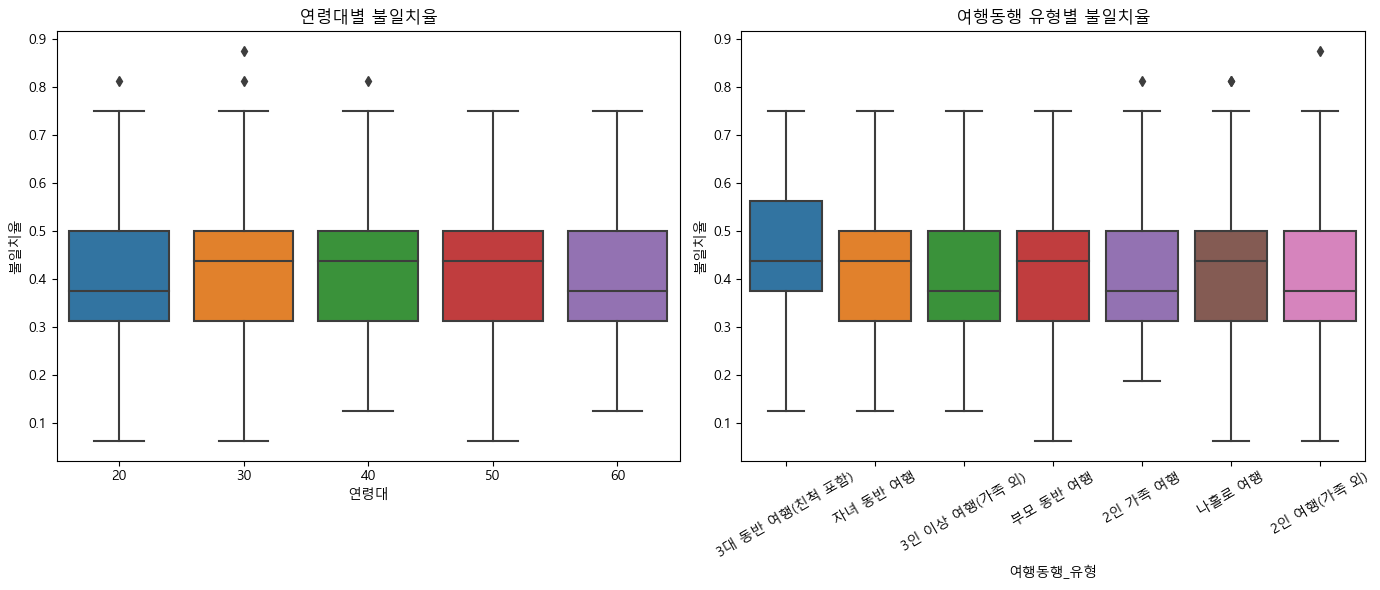

In [19]:
# 한글 깨짐 방지 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림 틀 설정
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 연령대별 불일치율
sns.boxplot(data=trav_mas_df, x='연령대', y='불일치율', ax=axes[0])
axes[0].set_title('연령대별 불일치율')

# 여행동행 유형별 불일치율
sns.boxplot(data=trav_mas_df, x='여행동행_유형', y='불일치율', ax=axes[1])
axes[1].set_title('여행동행 유형별 불일치율')
axes[1].tick_params(axis='x', rotation=30)  # 라벨 기울이기

plt.tight_layout()
plt.show()

In [20]:
# 결과 저장용
results = []

# 연령대별 정규성 검정
for name, group in trav_mas_df.groupby('연령대'):
    stat, p = shapiro(group['불일치율'])
    results.append((name, len(group), stat, p))

# 결과 보기
result_df = pd.DataFrame(results, columns=['연령대', '샘플 수', 'Shapiro-W', 'p-value'])
result_df['정규성 여부'] = result_df['p-value'].apply(lambda p: '정규성 만족' if p > 0.05 else '위반')
result_df.sort_values(by='연령대')


,연령대,샘플 수,Shapiro-W,p-value,정규성 여부
0,20,1346,0.974904,1.486137e-14,위반
1,30,1327,0.976519,7.005980e-14,위반
2,40,596,0.975320,1.775885e-08,위반
3,50,177,0.970664,8.648405e-04,위반
4,60,52,0.954646,4.595804e-02,위반


In [21]:
results = []

for name, group in trav_mas_df.groupby('여행동행_유형'):
    stat, p = shapiro(group['불일치율'])
    results.append((name, len(group), stat, p))

result_df = pd.DataFrame(results, columns=['동행유형', '샘플 수', 'Shapiro-W', 'p-value'])
result_df['정규성 여부'] = result_df['p-value'].apply(lambda p: '정규성 만족' if p > 0.05 else '위반')
result_df.sort_values(by='p-value')


,동행유형,샘플 수,Shapiro-W,p-value,정규성 여부
4,나홀로 여행,1016,0.976793,1.149372e-11,위반
1,2인 여행(가족 외),941,0.975872,2.223702e-11,위반
3,3인 이상 여행(가족 외),478,0.970272,2.870963e-08,위반
6,자녀 동반 여행,459,0.972492,1.348595e-07,위반
0,2인 가족 여행,303,0.965290,1.182150e-06,위반
5,부모 동반 여행,199,0.973562,8.262628e-04,위반
2,3대 동반 여행(친척 포함),102,0.963860,6.859152e-03,위반


In [22]:
# 귀무가설(H0): 연령대 간 불일치율의 분포에 차이가 없다.

# 그룹별 데이터 준비 (연령대별 불일치율)
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("연령대")]

# Kruskal-Wallis H-test 수행
stat, p = kruskal(*groups)

# 결과 출력
print(f"연령대별 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")

연령대별 Kruskal-Wallis 결과: H=1.747, p=0.782


In [23]:
#  귀무가설(H0): 여행동행_유형 간 불일치율의 분포에 차이가 없다.

# 그룹별 데이터 준비 (여행동행_유형 불일치율)
groups = [group["불일치율"].values for name, group in trav_mas_df.groupby("여행동행_유형")]

# Kruskal-Wallis H-test 수행
stat, p = kruskal(*groups)

# 결과 출력
print(f"여행동행_유형 Kruskal-Wallis 결과: H={stat:.3f}, p={p:.3f}")


여행동행_유형 Kruskal-Wallis 결과: H=6.741, p=0.345


| 구분[제주권]            | 검정 통계량 (H) | p-value | 유의수준 α = 0.05 | 해석 요약                            |
| --------------- | ---------- | ------- | ------------- | -------------------------------- |
| **연령대별 불일치율**   | 1.747      | 0.782   | ❌ 귀무가설 기각 불가  | 연령대 간 불일치율 분포는 통계적으로 **차이 없음**   |
| **동행 유형별 불일치율** | 6.741      | 0.345   | ❌ 귀무가설 기각 불가  | 동행 유형 간 불일치율 분포도 통계적으로 **차이 없음** |
